In [65]:
import numpy
from scipy import signal
from galpy.potential import LogarithmicHaloPotential
from galpy.orbit import Orbit
from galpy.df import streamgapdf, impulse_deltav_plummer_curvedstream
from galpy.util import bovy_conversion, bovy_coords
%pylab inline
R0, V0= 8., 220.

Populating the interactive namespace from numpy and matplotlib


#The effect of small impacts with the same mass

In [35]:
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
xv_prog_init= numpy.array([30.,0.,0.,0., 105.74895, 105.74895])
def convert_to_cylindrical(xv):
    R,phi,Z= bovy_coords.rect_to_cyl(xv[:,0],xv[:,1],xv[:,2])
    vR,vT,vZ= bovy_coords.rect_to_cyl_vec(xv[:,3],xv[:,4],xv[:,5],R,phi,Z,cyl=True)
    out= numpy.empty_like(xv)
    # Preferred galpy arrangement of cylindrical coordinates
    out[:,0]= R
    out[:,1]= vR
    out[:,2]= vT
    out[:,3]= Z
    out[:,4]= vZ
    out[:,5]= phi
    return out
RvR_prog_init= convert_to_cylindrical(xv_prog_init[:,numpy.newaxis].T)[0,:]
prog_init= Orbit([RvR_prog_init[0]/R0,RvR_prog_init[1]/V0,RvR_prog_init[2]/V0,
                  RvR_prog_init[3]/R0,RvR_prog_init[4]/V0,RvR_prog_init[5]])
times= numpy.linspace(0.,10.1/bovy_conversion.time_in_Gyr(V0,R0),10001)
prog_init.integrate(times,lp)

In [51]:
def dO(v,x,x0,v0,b=0.,w=numpy.array([6.82200571,132.7700529,149.4174464])/V0,
       GM=10**-4./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.100/R0):
    return numpy.sum(v*impulse_deltav_plummer_curvedstream(v,x,b,w,x0,v0,GM,rs),axis=1)

In [52]:
#Get the stream near 10 Gyr
nstars= 101
vs= numpy.zeros((nstars,3))
xs= numpy.zeros((nstars,3))
evalts= numpy.linspace(9.95/bovy_conversion.time_in_Gyr(V0,R0),10.05/bovy_conversion.time_in_Gyr(V0,R0),nstars)
for ii in range(3):
    vs[:,0]= prog_init.vx(evalts)
    vs[:,1]= prog_init.vy(evalts)
    vs[:,2]= prog_init.vz(evalts)
    xs[:,0]= prog_init.x(evalts)
    xs[:,1]= prog_init.y(evalts)
    xs[:,2]= prog_init.z(evalts)

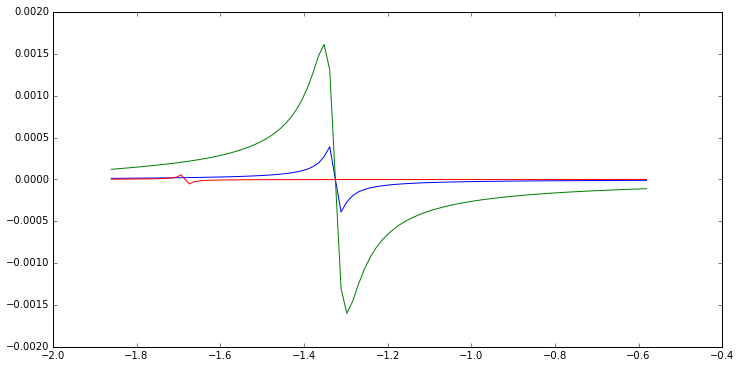

In [91]:
plot(xs[:,0],dO(vs,xs,xs[51],vs[51]))
plot(xs[:,0],dO(vs,xs,xs[51],vs[51],GM=10**-3./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.250/R0))
plot(xs[:,0],dO(vs,xs,xs[51],vs[51],GM=10**-5./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.04/R0))

In [93]:
def randomdO(nimpacts,xs,vs,GM=10**-4./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.100/R0):
    out= numpy.zeros(len(xs))
    for ii in range(nimpacts):
        randindx= int(numpy.floor(numpy.random.uniform(size=1)*len(xs)))
        out+= dO(vs,xs,xs[randindx],vs[randindx],GM=GM,rs=rs)
    return out

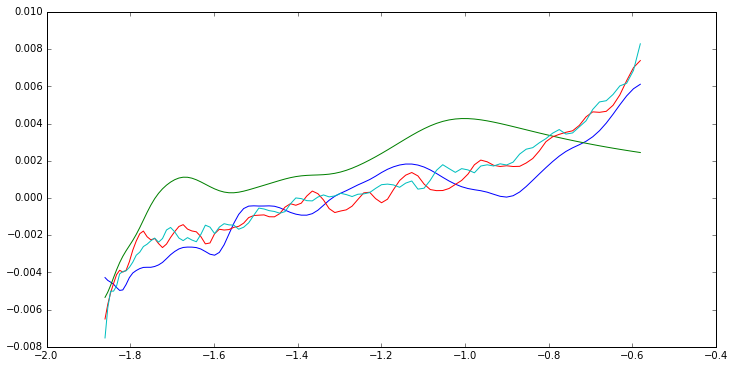

In [113]:
plot(xs[:,0],randomdO(100,vs,xs))
plot(xs[:,0],randomdO(10,vs,xs,GM=10**-3./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.250/R0))
plot(xs[:,0],randomdO(1000,vs,xs,GM=10**-5./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.04/R0))
plot(xs[:,0],randomdO(10000,vs,xs,GM=10**-6./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.016/R0))

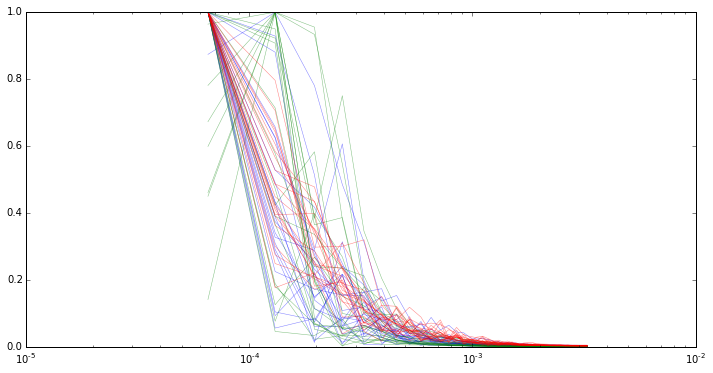

In [109]:
figsize(12,6)
for ii in range(21):
    px, py=signal.periodogram(randomdO(100,vs,xs),fs=(xs[1,0]-xs[0,0])) 
    semilogx(px,py/numpy.amax(py),color='b',lw=0.5,alpha=0.5)
for ii in range(21):
    px, py= signal.periodogram(randomdO(10,vs,xs,GM=10**-3./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.250/R0),fs=(xs[1,0]-xs[0,0]))
    semilogx(px,py/numpy.amax(py),color='g',lw=0.5,alpha=0.5)
for ii in range(21):
    px, py= signal.periodogram(randomdO(1000,vs,xs,GM=10**-5./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.04/R0),fs=(xs[1,0]-xs[0,0]))
    semilogx(px,py/numpy.amax(py),color='r',lw=0.5,alpha=0.5)

0.0456566530901
0.0445013033925
0.0454929939009
0.0458620248278


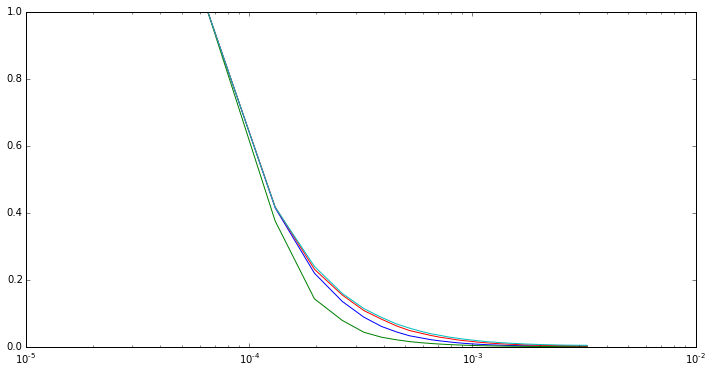

In [112]:
ppy= numpy.zeros((len(px),1001))
for ii in range(ppy.shape[1]):
    ppy[:,ii]= signal.periodogram(randomdO(100,vs,xs),fs=(xs[1,0]-xs[0,0]))[1]
semilogx(px,numpy.median(ppy,axis=1)/numpy.amax(numpy.median(ppy,axis=1)))
print numpy.amax(numpy.median(ppy,axis=1))
ppy= numpy.zeros((len(px),1001))
for ii in range(ppy.shape[1]):
    ppy[:,ii]= signal.periodogram(randomdO(10,vs,xs,GM=10**-3./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.250/R0),fs=(xs[1,0]-xs[0,0]))[1]
semilogx(px,numpy.median(ppy,axis=1)/numpy.amax(numpy.median(ppy,axis=1)))
print numpy.amax(numpy.median(ppy,axis=1))
ppy= numpy.zeros((len(px),1001))
for ii in range(ppy.shape[1]):
    ppy[:,ii]= signal.periodogram(randomdO(1000,vs,xs,GM=10**-5./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.04/R0),fs=(xs[1,0]-xs[0,0]))[1]
semilogx(px,numpy.median(ppy,axis=1)/numpy.amax(numpy.median(ppy,axis=1)))
print numpy.amax(numpy.median(ppy,axis=1))
ppy= numpy.zeros((len(px),1001))
for ii in range(ppy.shape[1]):
    ppy[:,ii]= signal.periodogram(randomdO(10000,vs,xs,GM=10**-6./bovy_conversion.mass_in_1010msol(V0,R0),rs=0.016/R0),fs=(xs[1,0]-xs[0,0]))[1]
semilogx(px,numpy.median(ppy,axis=1)/numpy.amax(numpy.median(ppy,axis=1)))
print numpy.amax(numpy.median(ppy,axis=1))